In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow import keras
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('/content/goldstock.csv')
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [3]:
df.tail(
)

,Unnamed: 0,Date,Close,Volume,Open,High,Low
2506,2528,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2529,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2530,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2531,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2510,2532,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [5]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
Close,0
Volume,0
Open,0
High,0
Low,0


In [8]:
df.duplicated().value_counts()

,count
False,2511


# Task
Build a regression model step-by-step to predict the target variable based on the features in the dataset.

## Preprocessing and feature engineering

### Subtask:
Convert the 'Date' column to datetime objects and potentially extract time-based features if relevant.


**Reasoning**:
Convert the 'Date' column to datetime objects and extract year, month, and day, then drop the original 'Date' column.



In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)
df.head()

,Unnamed: 0,Close,Volume,Open,High,Low,Year,Month,Day
0,0,2029.3,166078.0,2027.4,2041.9,2022.2,2024,1,19
1,1,2021.6,167013.0,2009.1,2025.6,2007.7,2024,1,18
2,2,2006.5,245194.0,2031.7,2036.1,2004.6,2024,1,17
3,3,2030.2,277995.0,2053.4,2062.8,2027.6,2024,1,16
4,4,2051.6,250946.0,2033.2,2067.3,2033.1,2024,1,12


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets and verify the shapes.



In [13]:
X = df.drop(['Close', 'Unnamed: 0'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2008, 7)
Shape of X_test: (503, 7)
Shape of y_train: (2008,)
Shape of y_test: (503,)


## Model selection

### Subtask:
Choose a suitable regression model (e.g., Linear Regression, Ridge, Lasso, or a more complex model like a neural network) based on the data characteristics.


**Reasoning**:
Based on the dataset size and the nature of the features, Linear Regression and Ridge Regression are suitable initial models to consider. I will use code_block to briefly justify this choice.



In [14]:
print("Based on the dataset size (2511 rows) and the numerical features (including the extracted date components), simple linear models like Linear Regression and Ridge Regression are appropriate starting points. They are less likely to overfit on this relatively small dataset compared to more complex models, and they can capture linear relationships between the features and the target variable 'Close'.")

Based on the dataset size (2511 rows) and the numerical features (including the extracted date components), simple linear models like Linear Regression and Ridge Regression are appropriate starting points. They are less likely to overfit on this relatively small dataset compared to more complex models, and they can capture linear relationships between the features and the target variable 'Close'.


## Model training

### Subtask:
Train the selected regression model using the training data.


**Reasoning**:
Import and train a Linear Regression model on the training data.



In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the model's performance using appropriate metrics on the testing data.


**Reasoning**:
Evaluate the trained model by making predictions on the test set and calculating the MSE and R-squared score.



# MSE & R-Squared Score

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 32.672734570938125
R-squared Score: 0.9996321274551795


## Prediction (optional)

### Subtask:
Make predictions using the trained model.


**Reasoning**:
Make predictions on the test set using the trained model and store them in a variable.



In [17]:
predictions = model.predict(X_test)
print("First 5 predictions:")
print(predictions[:5])

First 5 predictions:
[1944.79775478 1251.6922673  1321.71059626 1270.63356993 1727.4958515 ]


In [19]:
print("Actual values for the first 5 predictions:")
print(y_test[:5].values)

Actual values for the first 5 predictions:
[1945.6 1253.3 1321.3 1274.9 1728.8]


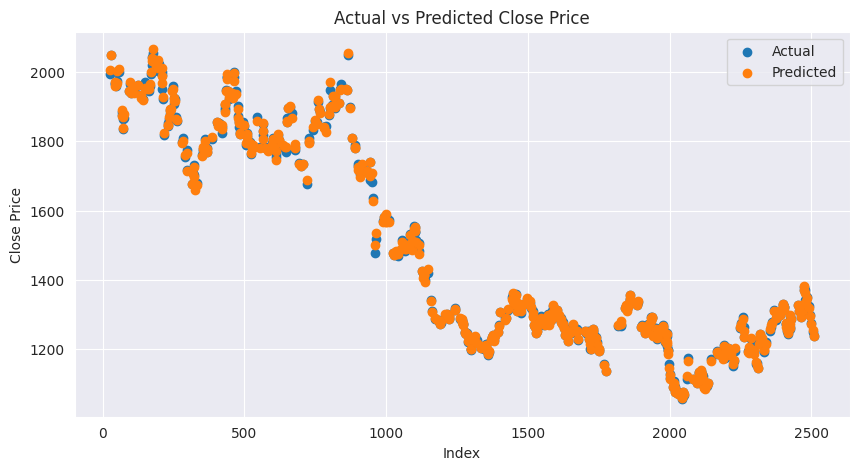

In [22]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test.index, y_test, label='Actual')
plt.scatter(y_test.index, predictions, label='Predicted')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()